# Welcome to A New Data Science Problem!

## Introduction

In this data science problem, we will address an industry-relevant machine learning task using a standard dataset, designed to enhance our modeling skills.

Financial loan services are critical across various industries, including big banks, financial institutions, and government programs. A primary goal of these organizations is to minimize payment defaults by ensuring individuals repay their loans as expected. To achieve this efficiently and systematically, many companies rely on machine learning to predict which borrowers are at the highest risk of default. This allows them to target the right interventions and allocate resources effectively.

Our task in this data science problem is to address the loan default prediction challenge for a unique group of individuals who received financial loans.

As newly hired data scientists at a leading financial institution, we are tasked with developing a predictive model to identify borrowers likely to default on their loans. We have access to a dataset containing information about individuals who received loans in 2021.

This financial institution seeks to understand the default risk for each borrower to strategically allocate resources and support them as needed. In this project, we will implement three machine learning models—**Logistic Regression, Random Forest, and XGBoost**—to tackle this problem. We will compare their performance and determine the most effective model for predicting loan defaults in this critical scenario.

## Understanding the Datasets

### Train vs. Test

In this data science task, we will work with two datasets provided by a financial institution, each containing information about past borrowers and their specific loans. The datasets are titled `train.csv` and `test.csv`.

* `train.csv` includes data for 70% of the total sample, representing 255,347 borrowers. Importantly, it reveals whether or not each borrower defaulted on their loan payments (the “ground truth”).
* `test.csv` contains data for the remaining 109,435 borrowers in the sample. However, this dataset does not disclose whether the borrowers defaulted on their loans.

Our objective is to analyze patterns in the `train.csv` data and use those insights to predict whether the borrowers in the `test.csv` dataset will default on their loan payments. This prediction task will help the financial institution allocate resources effectively to manage potential risks.

### Dataset descriptions

Both `train.csv` and `test.csv` datasets contain one row per unique loan, with each observation identified by a unique LoanID representing the period during which the loan was active.

In the `train.csv` dataset, an additional column, **Default**, serves as the target label for the task. This binary column indicates whether a borrower defaulted on their loan payments.

Aside from the **Default** column in `train.csv`, both datasets share an identical set of features. These features can be leveraged to train a machine learning model and make predictions. Below is a description of each feature, which we will explore to maximize their effectiveness in solving this problem.

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## Import Python Modules

Start by importing the essential modules that will be used throughout this project. Since this is an open-ended project, feel free to utilize any of your preferred libraries that you believe will be helpful for this data science problem. For instance, the following popular packages might be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [42]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

#import treain test splitting, gridsearch
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV


# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



#evaluation metric
from sklearn.metrics import accuracy_score,recall_score, precision_score,f1_score, roc_auc_score, roc_curve
confusion_matrix, ConfusionMatrixDisplay

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
from xgboost import plot_importance

%matplotlib inline

# Phase 2: Analyze

## Load the Data

After importing the packages, let's load the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [3]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data

Let's explore, clean, validate, and visualize the data 

In [5]:
#find the dtype and any misisng values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

Summary: 

* The dataset consists of 17 features and one target/label column.
* The data includes various types, such as integers, floats, and strings/objects.
* There are no missing (null) values in the dataset.

In [6]:
# validating the null values
train_df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

Summary:
* It validates that there is no missing vaue in the dataset

In [7]:
# Generate descriptive statistics
train_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


Summary:
* Based on the descriptive statistics, it appears that there are no extreme value/outliers or extreme anomalies in the dataset.

In [8]:
# find the column name in the dataset
train_df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

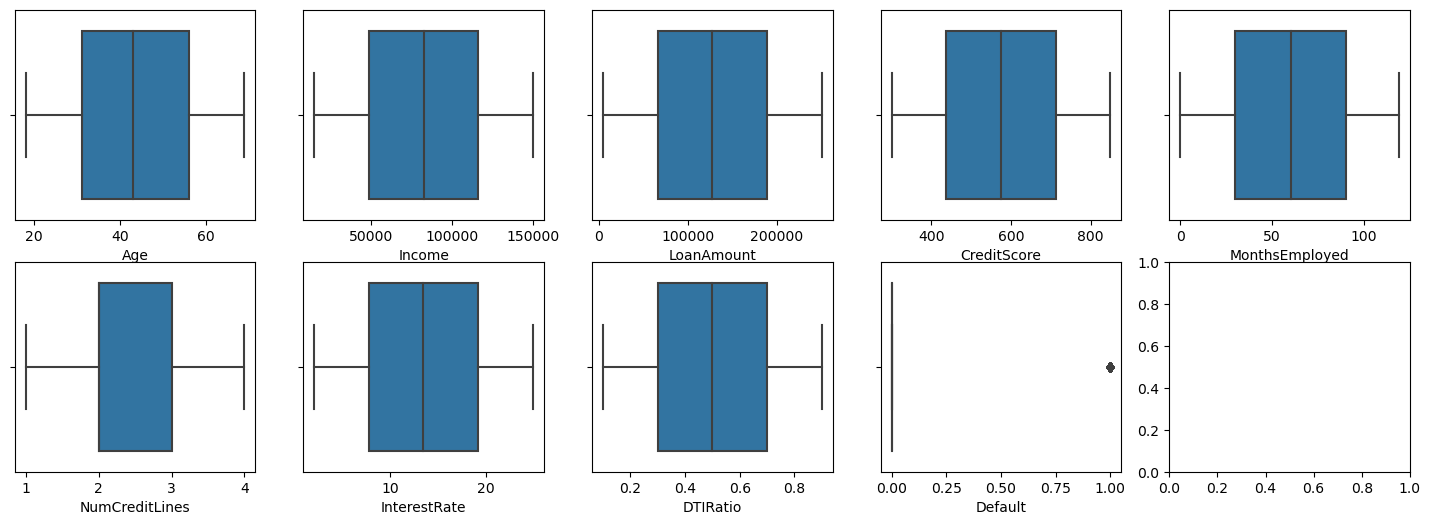

In [9]:
# Plotting a box-and-whisker plot to confirm the absence of outliers or anomalies in the dataset
fig,axes=plt.subplots(2,5, figsize=(18,6))
sns.boxplot(data=train_df, x='Age', ax=axes[0,0])
sns.boxplot(data=train_df, x='Income', ax=axes[0,1])
sns.boxplot(data=train_df, x='LoanAmount', ax=axes[0,2])
sns.boxplot(data=train_df, x='CreditScore', ax=axes[0,3])
sns.boxplot(data=train_df, x='MonthsEmployed', ax=axes[0,4])
sns.boxplot(data=train_df, x='NumCreditLines', ax=axes[1,0])
sns.boxplot(data=train_df, x='InterestRate', ax=axes[1,1])
sns.boxplot(data=train_df, x='DTIRatio', ax=axes[1,2])
sns.boxplot(data=train_df, x='Default', ax=axes[1,3])


Summary:

* It looks like there is no outlier

In [10]:
#find the duplicate value
train_df.duplicated().sum()

0

Summary:
* There is no duplicated values in the dataset



C:\Users\kumi2021\AppData\Local\Temp\ipykernel_28308\1263065932.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag"))


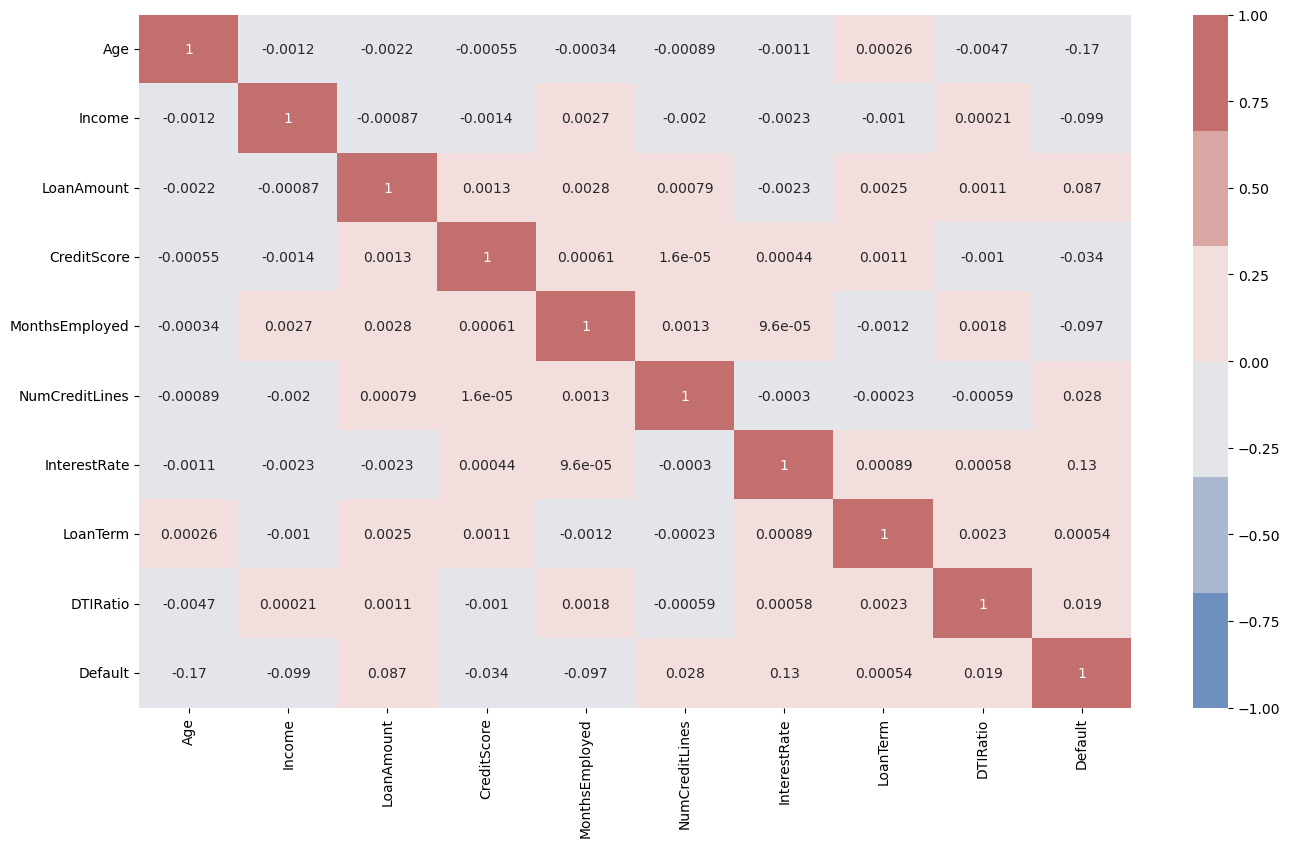

In [11]:
# let's see the correleration among the variables
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag"))

Summary:

* The correlation heatmap indicates that there are no strong relationships among the variables

In [12]:
# Calculate the percentage distribution of each label in the dataset
train_df['Default'].value_counts(normalize=True)

0    0.883872
1    0.116128
Name: Default, dtype: float64

Summary:
* The dataset looks imbalanced, with a significantly larger proportion of Class 0 compared to Class 1. This imbalance can lead to biased model predictions if not addressed properly.
* When splitting the dataset into training and testing sets, we can use stratification to ensure that the class distribution remains consistent across both sets. This helps in maintaining the original imbalance ratio in each split.

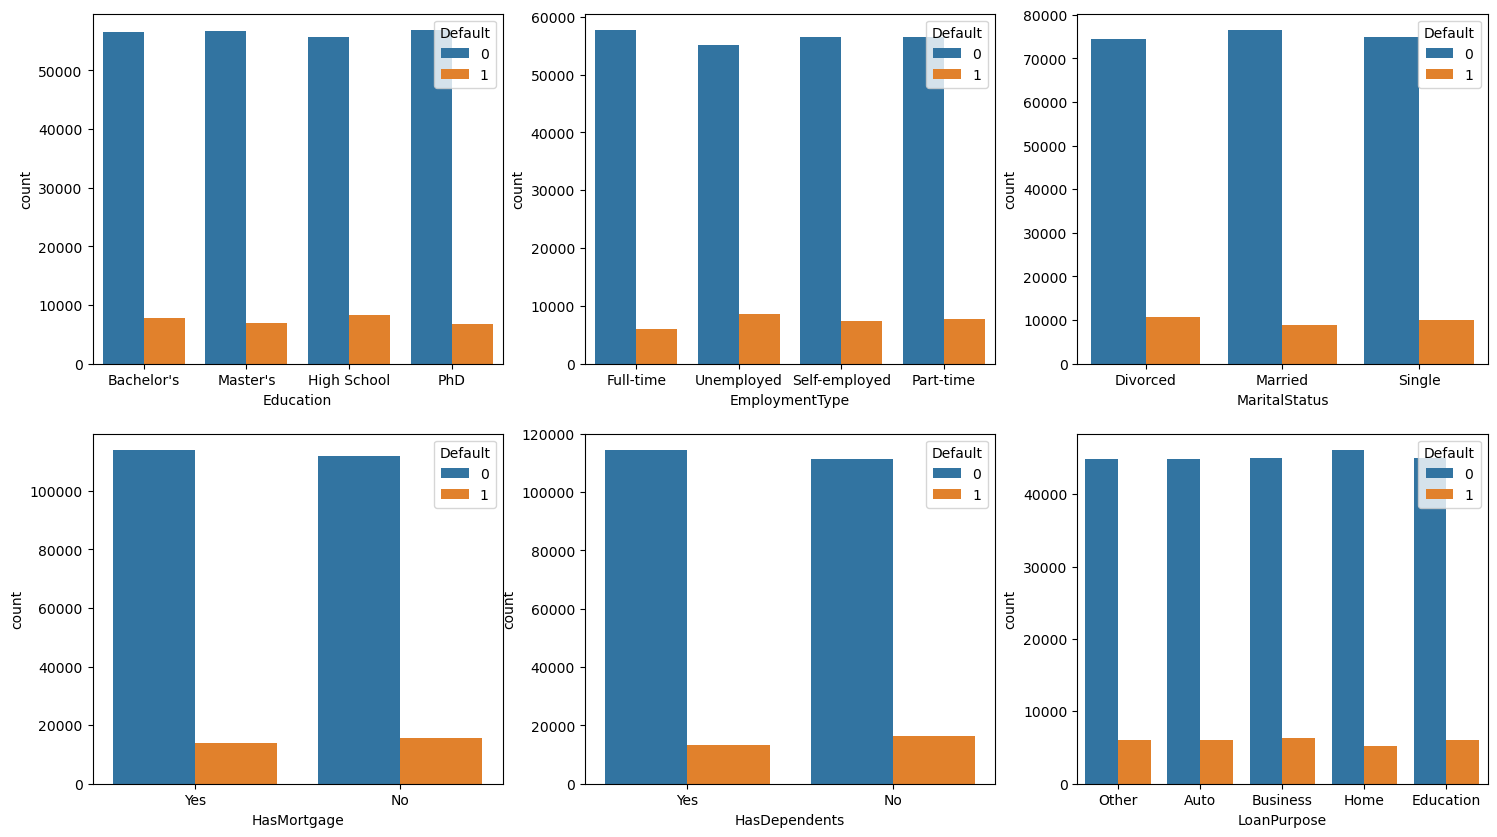

In [13]:
# Analyze the relationship between different variables and the default rate by plotting them 
fig, axes=plt.subplots(2,3, figsize=(18,10))
sns.countplot(data=train_df, x='Education', hue='Default', ax=axes[0,0])
sns.countplot(data=train_df, x='EmploymentType', hue='Default', ax=axes[0,1])
sns.countplot(data=train_df, x='MaritalStatus', hue='Default', ax=axes[0,2])
sns.countplot(data=train_df, x='HasMortgage', hue='Default', ax=axes[1,0])
sns.countplot(data=train_df, x='HasDependents', hue='Default', ax=axes[1,1])
sns.countplot(data=train_df, x='LoanPurpose', hue='Default', ax=axes[1,2])


Summary:
* These insights can help pinpoint the variables that are most sensitive to default risk.
* High school graduate, unemployed, divorced, no mortgage, no dependant, Business loan have higher rate of deafult 

In [14]:
#Identify the unique categories in each string column to prepare for converting categorical data into numerical format 

print('cat for Education:', train_df ['Education'].unique())
print('cat for EmploymentType:', train_df ['EmploymentType'].unique())
print('cat for MaritalStatus:', train_df ['MaritalStatus'].unique())
print('cat for HasMortgage:', train_df ['HasMortgage'].unique())
print('cat for HasDependents:', train_df ['HasDependents'].unique())
print('cat for LoanPurpose:', train_df ['LoanPurpose'].unique())
print('cat for HasCoSigner:', train_df ['HasCoSigner'].unique())



cat for Education: ["Bachelor's" "Master's" 'High School' 'PhD']
cat for EmploymentType: ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
cat for MaritalStatus: ['Divorced' 'Married' 'Single']
cat for HasMortgage: ['Yes' 'No']
cat for HasDependents: ['Yes' 'No']
cat for LoanPurpose: ['Other' 'Auto' 'Business' 'Home' 'Education']
cat for HasCoSigner: ['Yes' 'No']


In [15]:
# create the dictionary to map the category
Education_map={'High School':0, "Bachelor's":1, "Master's":2, 'PhD':3}
EmploymentType_map={'Unemployed':0, 'Self-employed':1, 'Part-time':2, 'Full-time':3}
MaritalStatus_map={'Single':0, 'Married':1, 'Divorced':2}
HasMortgage_map={'No':0, 'Yes':1}
HasDependents_map={'No':0, 'Yes':1}
LoanPurpose_map={'Other':0, 'Auto':1, 'Home':2, 'Education':3, 'Business':4}
HasCoSigner_map={'No':0, 'Yes':1}

In [16]:
# finally map the category to the numical format
train_df['Education']=train_df['Education'].map(Education_map)
train_df['EmploymentType']=train_df['EmploymentType'].map(EmploymentType_map)
train_df['MaritalStatus']=train_df['MaritalStatus'].map(MaritalStatus_map)
train_df['HasMortgage']=train_df['HasMortgage'].map(HasMortgage_map)
train_df['HasDependents']=train_df['HasDependents'].map(HasDependents_map)
train_df['LoanPurpose']=train_df['LoanPurpose'].map(LoanPurpose_map)
train_df['HasCoSigner']=train_df['HasCoSigner'].map(HasCoSigner_map)

In [17]:
# check whether the mapping is done correctly or not/ validarting the mapping
train_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,1,3,2,1,1,0,1,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,2,3,1,0,0,0,1,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,2,0,2,1,1,1,0,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,0,3,1,0,0,4,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,1,0,2,0,1,1,0,0


**Splitting the dataset for Training and Testing**

In [18]:
# Separate the dataset into training features (X) and the target label (y) to prepare for model training
X=train_df.copy().drop(['Default', 'LoanID'], axis=1)
y=train_df['Default']

In [19]:
# Divide the training and testing set 
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

# Phase 3: Construct the Model

Since the target variable is binary, and there is no significant correlation among the features, Logistic Regression is selected as the initial model for prediction. This model is well-suited for binary classification tasks and provides a straightforward baseline for evaluating performance.

Model Assumptions:

* Outcome variable is categorical

* Observations are independent of each other

* No severe multicollinearity among X variables

* No extreme outliers

* Linear relationship between each X variable and the logit of the outcome variable

* Sufficiently large sample size

# Model 1: Logistic Regression

In [20]:
#fit the model
clf_log=LogisticRegression(random_state=42, max_iter=400).fit(X_train, y_train)

In [21]:
# predict based on the 
y_pred=clf_log.predict(X_test)

# Phase 4: Execute/Present the Results

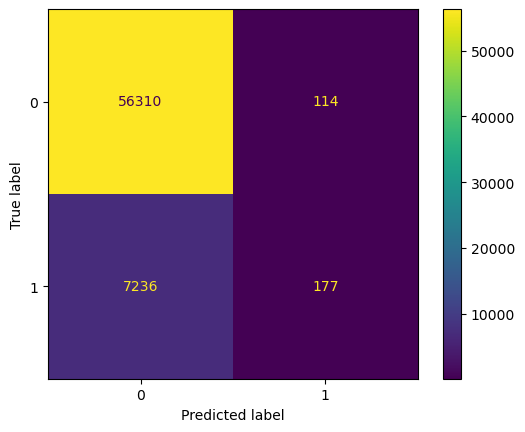

In [22]:
#presenting the result through confusion matrix
cm=confusion_matrix(y_test, y_pred, labels=clf_log.classes_)
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_log.classes_)
cm_disp.plot()
plt.show()

In [23]:
# Obtain performance scores based on evaluation metrics
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred)
recall=recall_score(y_test, y_pred)
f1_score=f1_score(y_test, y_pred)
print('accuracy:', accuracy)
print('recall:', recall)
print('precision:', precision)
print('f1:', f1_score)

accuracy: 0.8848630104798157
recall: 0.02387697288547147
precision: 0.6082474226804123
f1: 0.04595015576323988


Summary:
* the overall accuracy is satisfactory
* the recall score is significantly low 
* Therefore, the F1 score is low 
    
F1 score is calculated using the following formula: 

F1 = 2 * (precision * recall) / (precision + recall)

***Let's build another model and compare the result***

# Model 2: Random Forest

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.9],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }

# 3. Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

#5.calculate the time to train and fit the model

In [26]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 15min 59s
Wall time: 28min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.9], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [27]:
# Examine best score
rf_cv.best_score_

0.104852476128148

In [28]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [29]:
#create a function to get the evaluation metric and display by a Table 
def make_results(model_name:str, model_object, metric:str):
    """
        Arguments:
            model_name (str): The name you want to assign to the model in the output table.
            model_object: A fitted GridSearchCV object containing the trained model.
            metric (str): The evaluation metric to focus on (e.g., 'precision', 'recall', 'f1', or 'accuracy').

        Returns:
            pd.DataFrame: A DataFrame containing the F1, recall, precision, and accuracy scores
            for the model with the best mean score for the specified 'metric' across all validation folds.
    """

    # A dictionary to map the input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Create a data frame to store the results from the CV 
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Find the accuracy, precision, recall, and F1 score from the specified row 
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # FInally create the table and return it
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [30]:
#call the function and display the results by a table
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.562183,0.057824,0.104852,0.885348


In [31]:
# Use random forest model to predict on validation data
rf_test_preds = rf_cv.best_estimator_.predict(X_test)

In [32]:
# generate the score based on the test data
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    from sklearn.metrics import f1_score
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1_test = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1_test],
                          'accuracy': [accuracy]
                          })

    return table

In [33]:
# Get test scores for RF model
rf_val_scores = get_test_scores('RF test', rf_test_preds, y_test)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.562183,0.057824,0.104852,0.885348
0,RF test,0.583012,0.061109,0.110623,0.885897


# Model 3: XGBoost Classifier

In [34]:
# 1. Initialize the XGBoost classifier 
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary for hyperparameters tuning
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

# 3. Metrics to evaluate the model performance 
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Initialize the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

**Fit the model**

In [35]:
%%time
xgb_cv.fit(X_train,y_train)

CPU times: total: 14min 31s
Wall time: 2min 8s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [36]:
# Examine best score
print ('XGB best core:',xgb_cv.best_score_)
# Examine best parameters
print('XGB best parameter:', xgb_cv.best_params_)

XGB best core: 0.08286870503597123
XGB best parameter: {'learning_rate': 0.1, 'max_depth': 12, 'min_child_weight': 5, 'n_estimators': 300}


In [37]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.562183,0.057824,0.104852,0.885348
0,RF test,0.583012,0.061109,0.110623,0.885897
0,XGB cv,0.479876,0.082869,0.141324,0.883050


In [38]:
# Use random forest model to predict on validation data
xg_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xg_test_scores = get_test_scores('XGB test', xg_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xg_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.562183,0.057824,0.104852,0.885348
0,RF test,0.583012,0.061109,0.110623,0.885897
0,XGB cv,0.479876,0.082869,0.141324,0.883050
0,XGB test,0.509909,0.090247,0.153352,0.884283


Summary: 

Based on the results, the chanpion model is the XGBoost model. Let's find: 
* the important features based on teh model
* fine tune the model

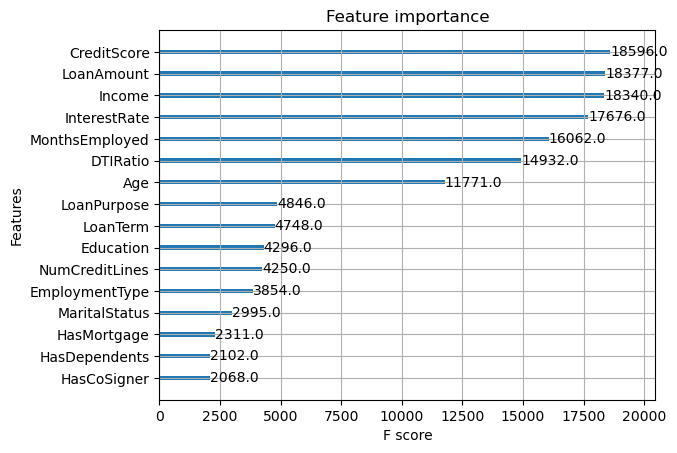

In [39]:
#plot the impoarant features
plot_importance(xgb_cv.best_estimator_);

**Since the recall score is low, adjusting the cut-off value can be explored to improve performance. Lowering the cut-off value may help enhance recall and contribute to better overall accuracy to some extent.**  

In [40]:
#predicting the probability on the test data
y_pred_proba = xgb_cv.predict_proba(X_test)[:, 1]

#different cutoff values
cutoffs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


results = []
for cutoff in cutoffs:
    y_pred = (y_pred_proba > cutoff).astype(int)
    auc_cutoff = roc_auc_score(y_test, y_pred)
    accuracy=accuracy_score (y_test, y_pred)
    recall=recall_score (y_test, y_pred)
    results.append({'Cutoff': cutoff, 'AUC': auc_cutoff, 'Accuacy': accuracy, 'Recall': recall})

# Create a dataframe of the results
df_results = pd.DataFrame(results)

# Print the table
print(df_results)

   Cutoff       AUC   Accuacy    Recall
0     0.1  0.663176  0.725018  0.582625
1     0.2  0.621875  0.833357  0.346418
2     0.3  0.586925  0.867271  0.221773
3     0.4  0.557277  0.879177  0.138001
4     0.5  0.539426  0.884283  0.090247
5     0.6  0.523411  0.884973  0.052475
6     0.7  0.512563  0.884957  0.027519
7     0.8  0.506123  0.884550  0.013220
8     0.9  0.501606  0.884127  0.003372


In [43]:
predicted_probability_test = xgb_cv.best_estimator_.predict(X_test)

fpr,tpr, thresholds=roc_curve(predicted_probability_test, y_test)
auc_score=roc_auc_score(predicted_probability_test, y_test)
print(f'auc score: {auc_score}')

auc score: 0.7010238404638144


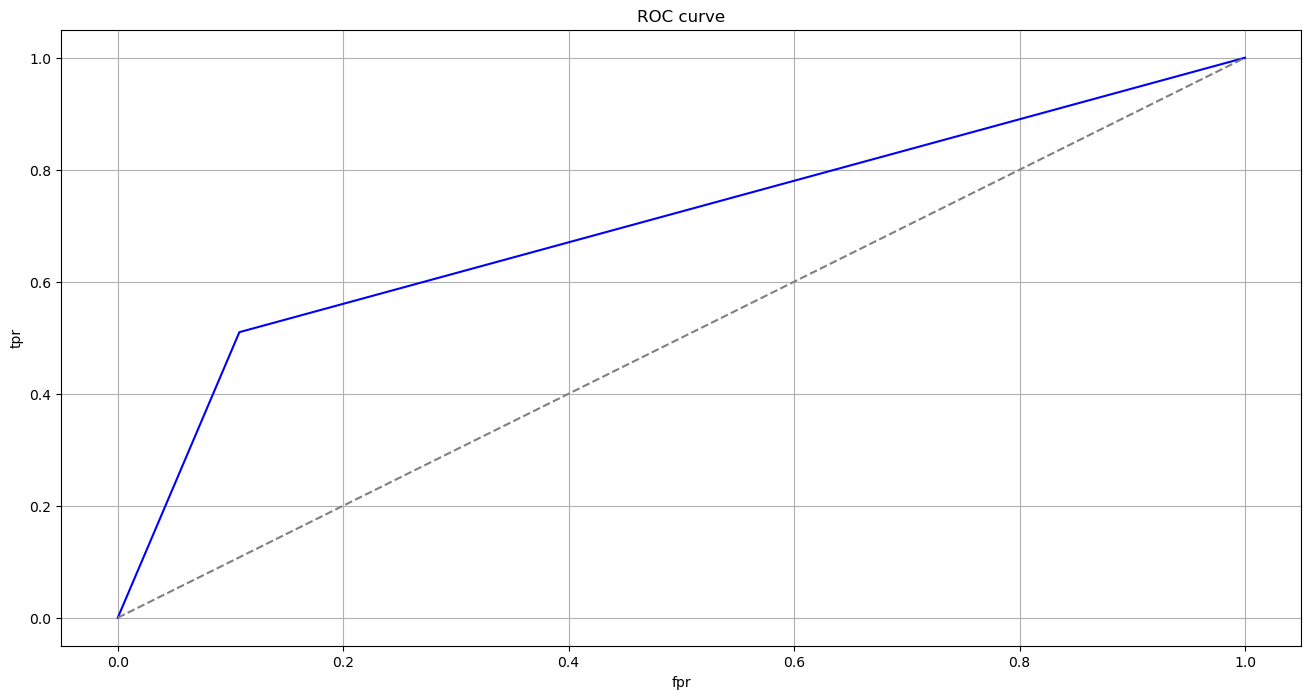

Optimal Threshold: 1


In [44]:
#plotting the AUC curve
plt.figure(figsize=(16,8))
plt.plot(fpr,tpr, color='blue', label=f'ROC curve (area ={auc_score:.2f})')
plt.plot([0,1], [0,1], color='grey', linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.grid()
plt.show()
# Find the optimal threshold

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)


Summary:

* Initial Rise in TPR: The curve starts with a steep increase, indicating that the classifier is effectively identifying true positives with a minimal increase in false positives at lower thresholds.

* Flattening of the Curve: As the FPR increases, the curve flattens, showing diminishing returns in the trade-off between true positives and false positives.

* AUC Analysis: If the curve is close to the diagonal (dashed line), it suggests that the classifier's performance is not much better than random guessing. A higher area under the curve (AUC) indicates better model performance.

# Finally predict the label for the unseen data

In [45]:
# test data visaulization 
test_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


In [46]:
#mapping the data like the training set
test_df_map=test_df.copy()

In [47]:
test_df_map['Education']=test_df_map['Education'].map(Education_map)
test_df_map['EmploymentType']=test_df_map['EmploymentType'].map(EmploymentType_map)
test_df_map['MaritalStatus']=test_df_map['MaritalStatus'].map(MaritalStatus_map)
test_df_map['HasMortgage']=test_df_map['HasMortgage'].map(HasMortgage_map)
test_df_map['HasDependents']=test_df_map['HasDependents'].map(HasDependents_map)
test_df_map['LoanPurpose']=test_df_map['LoanPurpose'].map(LoanPurpose_map)
test_df_map['HasCoSigner']=test_df_map['HasCoSigner'].map(HasCoSigner_map)

In [48]:
#validate the mapping
test_df_map.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,0,3,2,1,0,0,0
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,0,1,0,0,0,4,1
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,1,3,0,1,1,0,1
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,1,0,2,0,0,4,0
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,3,0,0,1,0,1,0


In [49]:
#dropping the ID column
test_df_1=test_df_map.drop(['LoanID'], axis=1)

In [50]:
#check the data
test_df_1.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,32,131645,43797,802,23,2,6.10,24,0.13,0,3,2,1,0,0,0
1,61,134312,18402,369,87,2,12.99,60,0.59,0,1,0,0,0,4,1
2,55,115809,151774,563,3,3,5.51,48,0.82,1,3,0,1,1,0,1
3,58,94970,55789,337,24,1,23.93,36,0.77,1,0,2,0,0,4,0
4,63,71727,189798,451,52,3,22.05,48,0.44,3,0,0,1,0,1,0


In [51]:
#best_estimator  for the xgboost model
best_xgb_model = xgb_cv.best_estimator_

In [52]:
# finally map the category to the numical format
test_df_1['Education']=test_df_1['Education'].map(Education_map)
test_df_1['EmploymentType']=test_df_1['EmploymentType'].map(EmploymentType_map)
test_df_1['MaritalStatus']=test_df_1['MaritalStatus'].map(MaritalStatus_map)
test_df_1['HasMortgage']=test_df_1['HasMortgage'].map(HasMortgage_map)
test_df_1['HasDependents']=test_df_1['HasDependents'].map(HasDependents_map)
test_df_1['LoanPurpose']=test_df_1['LoanPurpose'].map(LoanPurpose_map)
test_df_1['HasCoSigner']=test_df_1['HasCoSigner'].map(HasCoSigner_map)

In [53]:
# visluaize the unseen test data
test_df_1.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,32,131645,43797,802,23,2,6.10,24,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61,134312,18402,369,87,2,12.99,60,0.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,115809,151774,563,3,3,5.51,48,0.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,58,94970,55789,337,24,1,23.93,36,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63,71727,189798,451,52,3,22.05,48,0.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#find the probability of the data 
predicted_probability_for_both_label = best_xgb_model.predict_proba(test_df_1)
predicted_probability=predicted_probability_for_both_label[:,1]
#pick the new cutoff value 
new_cutoff=0.2
y_test_pred_final = (predicted_probability >= new_cutoff).astype(int)

In [55]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability, 'label':y_test_pred_final })

In [64]:
test_df_1.shape[0]

109435

In [65]:
# Let's match the shape: it should contain 109,435 rows and 3 columns 'CustomerID','predicted_probaility',  and  'predicted label'
print(prediction_df.shape[0]==test_df_1.shape[0])
prediction_df.head(100)

True


,LoanID,predicted_probability,label
0,7RYZGMKJIR,0.036162,0
1,JDL5RH07AM,0.009327,0
2,STAL716Y79,0.005935,0
3,SO0KKJ3IQB,0.015512,0
4,T99CWTYDCP,0.024641,0
...,...,...,...
95,ONVOWI60H1,0.059150,0
96,VMBG200QNC,0.002149,0
97,VPQHIJW94N,0.054673,0
98,IACYRUD13H,0.001808,0


Summary: 
* Feature Engineering can be conducted for the improvement
* Other models can be investigated 

# <h1><center>Hope the Notebook Will Help to Undestand the Basic of Handling a Data Science Problem!</center></h1> 